# Project 1 - Charles

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015.

#### 1. What is the outcome?

Answer: Paying Customers from free-tier customers

#### 2. What are the predictors/covariates? 

Answer: demographic data (age, gender, location and profession) and customer usage data (0 = inactive user, 1 = active user)

#### 3. What timeframe is this data relevent for?

Answer: Relevant to Jan - Apr 2015 and possibly future Jan to Apr periods

#### 4. What is the hypothesis?

Answer: The more active a user is, the more likely a user would convert from a free-tier customer to a paying customer, regardless of demographic

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
Admit | 0 = no admission 1 = admission | categorical
GPA | GPA scores 0 - 4 | discrete
GRE | GRA scores 200 - 800 | discrete
prestige | prestige scoes 1 - 4 | discrete

Admit = Admission into graduate school

GPA = graded from 0 to 4 including two decimal places

GRE = integer from 200 - 800 - note this scoring was changed in 2011. Scale was shortened and reduced in range to 130 to 170

prestige = subjective but integer from 1 to 4. 1 being least prestigious and 4 being most prestigious. 


We would like to explore the association between admission and GPA, GRE and prestige.


#### 2. What is the outcome?

Answer: Admit (0 = no, 1 = yes)

#### 3. What are the predictors/covariates? 

Answer: GPA, GRE, prestige

#### 4. What timeframe is this data relevent for?

Answer: The application periods of the graduate school up until 2011 when GRE scores changed. However if a translation table is used, the trends can be projected forward.

#### 4. What is the hypothesis?

Answer: The higher a combination of an applicant's GPA, GRE and prestige of alma mater is, the more likely an admission would be granted to the graduate school

    Using the above information, write a well-formed problem statement. 


## Problem Statement
Today we are constrained by HR resources and are taking too long to process applications leading to top talent being recruited by other graduate schools. If we ignore this problem, many excellent candidates for our school would be poached earlier by our competing schools leading to a decrease in quality students. 
Using information from past applications into a graduate school, determine how likely is an applicant accepted into said graduate school using previous quantitative scores (GRE, GPA) and qualitative scores (prestige of alma mater)

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To analyze our dataset and identify key characteristics to help us understand relationships and trends. Understanding if there is a correlation between an amalgamation of factors (GPA, GRE and prestige) and admission into graduate school.

#### 2a. What are the assumptions of the distribution of data? 

Answer: We are assuming that the data is of a normal distribution and is of the entire population at that given timeframe

#### 2b. How will you determine the distribution of your data? 

Answer: Generate a histogram

In [12]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
df = pd.read_csv('project-1/assets/admissions.csv')

In [14]:
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [28]:
df.columns = ["admit", "gre", "gpa", "prestige"]

In [31]:
print df.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


In [29]:
print df.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


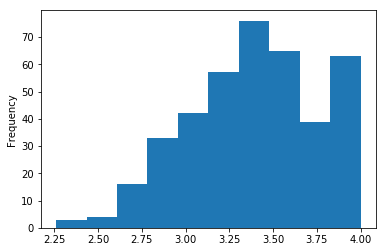

In [89]:
df.gpa.plot(kind='hist')

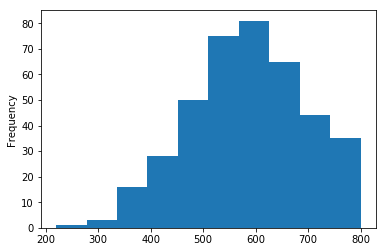

In [6]:
df.gre.plot(kind='hist')

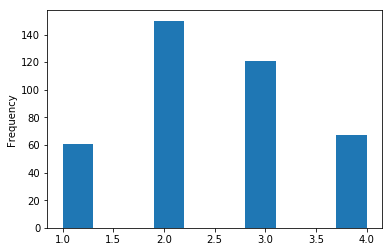

In [7]:
df.prestige.plot(kind='hist')

#### 3a. How might outliers impact your analysis? 

Answer: Can skew the mean/average and standard deviation which harms the overall reliability of the data for analysis

#### 3b. How will you test for outliers? 

Answer: Can plot a box plot


In [103]:
df[['gre', 'gpa', 'prestige']].describe()

,gre,gpa,prestige
count,398.000000,398.00000,399.000000
mean,588.040201,3.39093,2.486216
std,115.628513,0.38063,0.945333
min,220.000000,2.26000,1.000000
25%,520.000000,3.13000,2.000000
50%,580.000000,3.39500,2.000000
75%,660.000000,3.67000,3.000000
max,800.000000,4.00000,4.000000


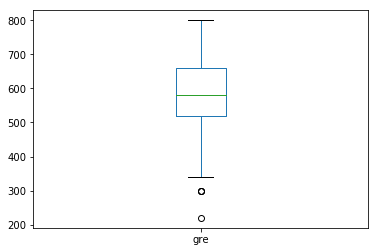

In [104]:
df[['gre']].plot(kind='box') 

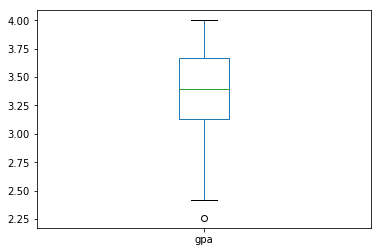

In [105]:
df[['gpa']].plot(kind='box') 

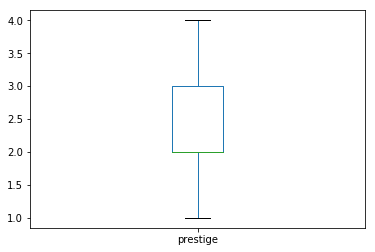

In [106]:
df[['prestige']].plot(kind='box') 

#### 4a. What is colinearity? 

Answer: When two variables/predictors are highly correlated in regression

#### 4b. How will you test for colinearity? 

Answer: First test for correlation between variables. If there is a strong correlation between variables there is a chance there there is high collinearity during regression. 

In [8]:
df[["gre", "gpa", "prestige"]].corr()

,gre,gpa,prestige
gre,1.000000,0.382408,-0.124533
gpa,0.382408,1.000000,-0.059031
prestige,-0.124533,-0.059031,1.000000


Considering that the correlation between each variable is far from 1 (with the exception of a weak positive correlation between GPA and GRE), we can safely assume that these variables have little to no collinearity amongst one another.


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 1. Ensure that the data is collected in a similar way and the varables are the same e.g. GPA, Prestige, GRE and during the same time frame. 

2. Obtain similar or more number of data points, not less. 

3. Ensure that problem statement/hypothesis is updated or kept the same. If it is not the same, it should not be compared.

4. Ensure that all assumptions are laid out in advance.

5. Generate histograms to determine the distribution of data. 

6. Generate box plots for discovering outliers - however, as shown above most of the outliers are genuine and are within the scope (e.g. 200 GRE score). Only exclude anomalies that are outside the test boundaries (e.g. 0 on prestige)

7. Check for colinearity by comparing correlation between variables. If variables highly correlated, remove one variable before testing or test individually. 


## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

### 1. Outline analysis method for predicting your outcome
Conduct a regression tests between the independent variable and dependent variables

In [32]:
# just trying out the code - ignore this.
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [33]:
statistic, pvalue = stats.f_oneway(df['admit'], df['gre'])
print pvalue

nan


### 2.Alternative Problem statement:
Applications for graduate schools are coming up, I only have a finite amount of time to apply to the relevant schools of interest. One particular school is of interest, and it would be beneficial to understanding what the baseline is so I can best prepare for the coming examinations.
Using information from past applications into the graduate school, determine how likely is an applicant accepted into said graduate schools using previous quantitative scores (GRE, GPA) and qualitative scores (pretige of alma mater)


### 3. Assumptions and risks of the alternative model:
- Assumptions are relatively the same and risks are the same